In [2]:
%pip install openai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="o1-preview",
    messages=[
        {
            "role": "user", 
            "content": "Write a bash script that takes a matrix represented as a string with format '[1,2],[3,4],[5,6]' and prints the transpose in the same format."
        }
    ],
    
)

print(response.choices[0].message.content)

To write a bash script that takes a matrix represented as a string such as '[1,2],[3,4],[5,6]' and prints its transpose in the same format, we can follow these steps:

1. Parse the input string to extract the rows of the matrix.
2. Split each row into individual elements.
3. Reorganize these elements to form the transposed matrix.
4. Format the transposed matrix back into the desired string format.

Here's the complete bash script:

```bash
#!/bin/bash

if [ -z "$1" ]; then
    echo "Usage: $0 '[1,2],[3,4],[5,6]'"
    exit 1
fi

input_string="$1"

# Replace '],[' with ']\n[' to separate rows
rows_string=$(echo "$input_string" | sed 's/\],\[/\]\n\[/g')

# Read rows into array
readarray -t rows_array <<< "$rows_string"

# Process the first row to get number of columns
first_row="${rows_array[0]}"
first_row=${first_row#[}
first_row=${first_row%]}
IFS=',' read -r -a elements <<< "$first_row"
number_of_columns=${#elements[@]}

# Initialize columns
declare -a columns
for ((j=0;j<number_of_co

In [4]:
from openai import OpenAI

client = OpenAI()

prompt = """
Instructions:
- Given the React component below, change it so that nonfiction books have red
  text. 
- Return only the code in your reply
- Do not include any additional formatting, such as markdown code blocks
- For formatting, use four space tabs, and do not allow any lines of code to 
  exceed 80 columns

const books = [
  { title: 'Dune', category: 'fiction', id: 1 },
  { title: 'Frankenstein', category: 'fiction', id: 2 },
  { title: 'Moneyball', category: 'nonfiction', id: 3 },
];

export default function BookList() {
  const listItems = books.map(book =>
    <li>
      {book.title}
    </li>
  );

  return (
    <ul>{listItems}</ul>
  );
}
"""

response = client.chat.completions.create(
    model="o1-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt
                },
            ],
        }
    ]
)

print(response.choices[0].message.content)

```jsx
const books = [
    { title: 'Dune', category: 'fiction', id: 1 },
    { title: 'Frankenstein', category: 'fiction', id: 2 },
    { title: 'Moneyball', category: 'nonfiction', id: 3 },
];

export default function BookList() {
    const listItems = books.map(book =>
        <li
            key={book.id}
            style={book.category === 'nonfiction' ? { color: 'red' } : {}}
        >
            {book.title}
        </li>
    );

    return (
        <ul>{listItems}</ul>
    );
}
```


In [1]:
import requests

def us_cities_weather_generator():
    """
    Generator that yields weather information for major US cities
    using Open-Meteo Weather API
    """
    # List of major US cities with their coordinates
    cities = [
        {"name": "New York", "latitude": 40.7128, "longitude": -74.0060},
        {"name": "Los Angeles", "latitude": 34.0522, "longitude": -118.2437},
        {"name": "Chicago", "latitude": 41.8781, "longitude": -87.6298},
        {"name": "Houston", "latitude": 29.7604, "longitude": -95.3698},
        {"name": "Phoenix", "latitude": 33.4484, "longitude": -112.0740}
    ]

    for city in cities:
        # Construct API URL for current weather
        url = f"https://api.open-meteo.com/v1/forecast?latitude={city['latitude']}&longitude={city['longitude']}&current_weather=true"
        
        try:
            # Fetch weather data
            response = requests.get(url)
            weather_data = response.json()
            
            # Extract relevant weather information
            current_weather = weather_data.get('current_weather', {})
            
            # Yield a dictionary with city details and current weather
            yield {
                "city": city['name'],
                "temperature": current_weather.get('temperature', 'N/A'),
                "windspeed": current_weather.get('windspeed', 'N/A'),
                "wind_direction": current_weather.get('winddirection', 'N/A')
            }
        
        except Exception as e:
            # Yield error information if API call fails
            yield {
                "city": city['name'],
                "error": str(e)
            }

# Example usage
def main():
    print("Current Weather for Major US Cities:")
    for weather_info in us_cities_weather_generator():
        if 'error' in weather_info:
            print(f"{weather_info['city']}: Error - {weather_info['error']}")
        else:
            print(f"{weather_info['city']}: {weather_info['temperature']}°C, Wind: {weather_info['windspeed']} km/h, Direction: {weather_info['wind_direction']}°")

if __name__ == "__main__":
    main()

Current Weather for Major US Cities:
New York: 16.1°C, Wind: 6.9 km/h, Direction: 152°
Los Angeles: 19.2°C, Wind: 9.0 km/h, Direction: 143°
Chicago: 7.6°C, Wind: 22.0 km/h, Direction: 252°
Houston: 16.8°C, Wind: 20.2 km/h, Direction: 5°
Phoenix: 22.5°C, Wind: 9.4 km/h, Direction: 88°


In [5]:
import requests
import json

class LondonRoutePlanner:
    def __init__(self,app_key):
        """
        Initialize the route planner with TfL API credentials
        """
        self.base_url = "https://api.tfl.gov.uk/journey/journeyresults"
        self.app_key = app_key

    def get_route_details(self, from_location, to_location):
        """
        Fetch route details between two locations
        """
        # Construct API request URL
        url = f"{self.base_url}/{from_location}/to/{to_location}"
        params = {
            "app_key": self.app_key
        }

        try:
            # Send API request
            response = requests.get(url, params=params)
            response.raise_for_status()
            route_data = response.json()

            # Process and display route information
            self._display_route_details(route_data)

        except requests.RequestException as e:
            print(f"Error fetching route information: {e}")

    def _display_route_details(self, route_data):
        """
        Display detailed route information step by step
        """
        # Check if routes exist
        if not route_data.get('journeys'):
            print("No routes found between the specified locations.")
            return

        print("\n--- Detailed Route Information ---")
        
        for i, journey in enumerate(route_data.get('journeys', []), 1):
            print(f"\nRoute Option {i}:")
            
            # Transportation Mode
            print(f"Primary Mode: {journey.get('mode', {}).get('name', 'Unknown')}")
            
            # Total Journey Duration
            print(f"Total Journey Time: {journey.get('duration', 'N/A')} minutes")
            
            # Detailed Legs of the Journey
            print("\nJourney Legs:")
            for leg in journey.get('legs', []):
                print(f"- {leg.get('mode', {}).get('name', 'Unknown')} from {leg.get('departurePoint', {}).get('commonName', 'Unknown')} to {leg.get('arrivalPoint', {}).get('commonName', 'Unknown')}")
                print(f"  Duration: {leg.get('duration', 'N/A')} minutes")

def main():
    # Replace with your actual TfL API credentials
    APP_KEY = "3fe0cafd410a4ee0954f33ff36e708fe"

    # Create route planner instance
    route_planner = LondonRoutePlanner(APP_KEY)

    # Example usage
    from_location = input("Enter starting location in London: ")
    to_location = input("Enter destination location in London: ")

    # Fetch and display routes
    route_planner.get_route_details(from_location, to_location)

if __name__ == "__main__":
    main()

No routes found between the specified locations.


In [7]:
import tkinter as tk

class SwipeDeleteList:
    def __init__(self, master):
        self.master = master
        master.title("Swipe to Delete List")
        
        # List frame
        self.list_frame = tk.Frame(master)
        self.list_frame.pack(fill=tk.BOTH, expand=True)
        
        # Scrollbar
        self.scrollbar = tk.Scrollbar(self.list_frame)
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
        # Listbox
        self.listbox = tk.Listbox(self.list_frame, yscrollcommand=self.scrollbar.set)
        self.listbox.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        self.scrollbar.config(command=self.listbox.yview)
        
        # Input frame
        self.input_frame = tk.Frame(master)
        self.input_frame.pack(fill=tk.X)
        
        # Entry for adding items
        self.entry = tk.Entry(self.input_frame, width=30)
        self.entry.pack(side=tk.LEFT, padx=5, pady=5, expand=True, fill=tk.X)
        
        # Add button
        self.add_button = tk.Button(self.input_frame, text="Add", command=self.add_item)
        self.add_button.pack(side=tk.RIGHT, padx=5, pady=5)
        
        # Swipe tracking variables
        self.start_x = 0
        self.start_y = 0
        
        # Bind mouse events for swipe detection
        self.listbox.bind('<ButtonPress-1>', self.on_press)
        self.listbox.bind('<B1-Motion>', self.on_drag)
        self.listbox.bind('<ButtonRelease-1>', self.on_release)
        
        # List to track item deletion states
        self.item_states = {}

    def add_item(self):
        """Add a new item to the list"""
        item = self.entry.get().strip()
        if item:
            self.listbox.insert(tk.END, item)
            self.item_states[self.listbox.size()-1] = 0
            self.entry.delete(0, tk.END)

    def on_press(self, event):
        """Record the start of a potential swipe"""
        self.start_x = event.x
        self.start_y = event.y

    def on_drag(self, event):
        """Track the drag movement"""
        # Detect horizontal swipe
        dx = event.x - self.start_x
        
        # Get the item index
        index = self.listbox.nearest(event.y)
        
        # Update item state based on swipe distance
        if abs(dx) > 50:  # Swipe threshold
            self.item_states[index] = dx

    def on_release(self, event):
        """Handle item deletion on swipe release"""
        # Get the item index
        index = self.listbox.nearest(event.y)
        
        # Check if swiped far enough to delete
        if index in self.item_states and abs(self.item_states[index]) > 50:
            self.listbox.delete(index)
            del self.item_states[index]
            
            # Rebuild item_states dictionary to maintain correct indexing
            new_states = {}
            for i, state in enumerate(self.item_states.values()):
                new_states[i] = state
            self.item_states = new_states

def main():
    root = tk.Tk()
    root.geometry("300x400")
    app = SwipeDeleteList(root)
    root.mainloop()

if __name__ == "__main__":
    main()

In [2]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


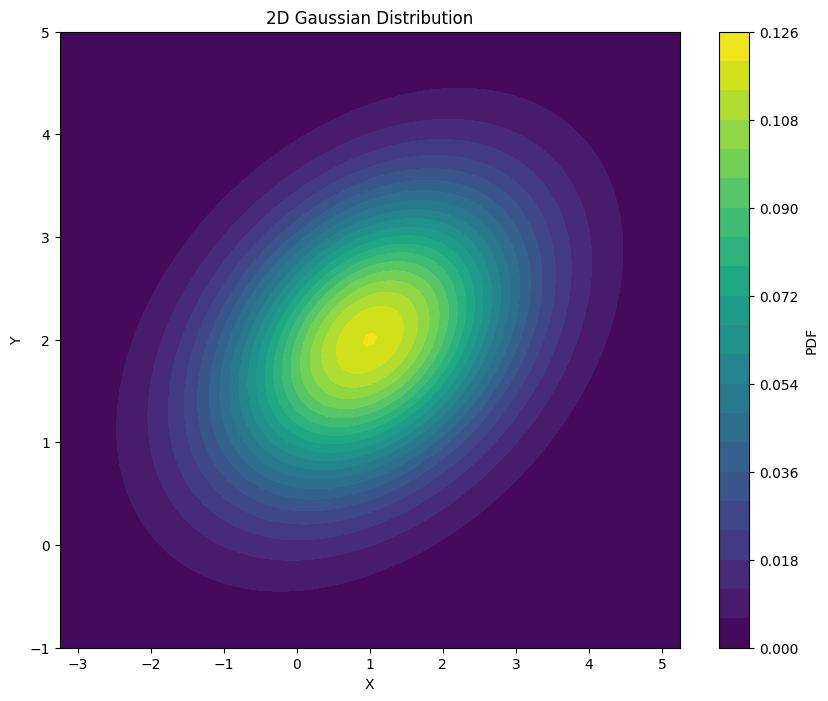

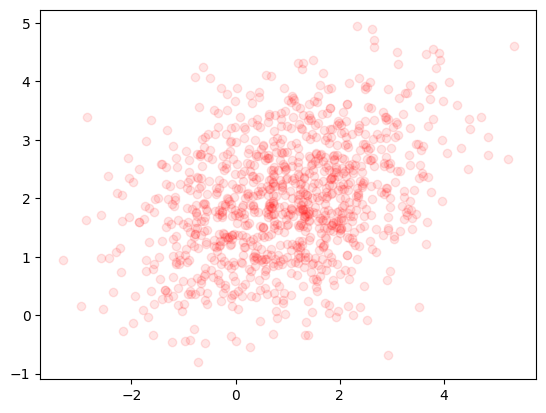

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

class MultivariateGaussian:
    """
    A class to represent and sample from a multivariate Gaussian distribution.
    
    Parameters:
    -----------
    mean : array-like
        Mean vector (μ) of the distribution
    covariance : array-like
        Covariance matrix (Σ) of the distribution
    """
    
    def __init__(self, mean, covariance):
        self.mean = np.array(mean)
        self.covariance = np.array(covariance)
        
        # Validate dimensions
        if len(self.mean.shape) != 1:
            raise ValueError("Mean must be a 1D array")
        if len(self.covariance.shape) != 2:
            raise ValueError("Covariance must be a 2D array")
        if self.covariance.shape[0] != self.covariance.shape[1]:
            raise ValueError("Covariance matrix must be square")
        if self.mean.shape[0] != self.covariance.shape[0]:
            raise ValueError("Mean and covariance dimensions must match")
            
        # Verify covariance is symmetric and positive semi-definite
        if not np.allclose(self.covariance, self.covariance.T):
            raise ValueError("Covariance matrix must be symmetric")
        eigvals = np.linalg.eigvals(self.covariance)
        if not np.all(eigvals >= -1e-10):  # Allow for small numerical errors
            raise ValueError("Covariance matrix must be positive semi-definite")
    
    def pdf(self, x):
        """
        Compute the probability density function at point(s) x.
        
        Parameters:
        -----------
        x : array-like
            Point(s) at which to evaluate the PDF. Shape should be (n_dimensions,) 
            for a single point or (n_points, n_dimensions) for multiple points
        
        Returns:
        --------
        float or array
            PDF value(s) at x
        """
        return multivariate_normal.pdf(x, mean=self.mean, cov=self.covariance)
    
    def sample(self, n_samples=1):
        """
        Generate random samples from the distribution.
        
        Parameters:
        -----------
        n_samples : int
            Number of samples to generate
            
        Returns:
        --------
        array
            Generated samples with shape (n_samples, n_dimensions)
        """
        return np.random.multivariate_normal(self.mean, self.covariance, size=n_samples)
    
    def plot_2d(self, grid_points=100, n_contours=20):
        """
        Plot the PDF contours for a 2D Gaussian distribution.
        
        Parameters:
        -----------
        grid_points : int
            Number of points in each dimension for plotting
        n_contours : int
            Number of contour levels to plot
        """
        if len(self.mean) != 2:
            raise ValueError("plot_2d only works for 2D distributions")
            
        # Create grid of points
        x = np.linspace(self.mean[0] - 3*np.sqrt(self.covariance[0,0]), 
                       self.mean[0] + 3*np.sqrt(self.covariance[0,0]), 
                       grid_points)
        y = np.linspace(self.mean[1] - 3*np.sqrt(self.covariance[1,1]), 
                       self.mean[1] + 3*np.sqrt(self.covariance[1,1]), 
                       grid_points)
        X, Y = np.meshgrid(x, y)
        
        # Compute PDF values
        pos = np.dstack((X, Y))
        Z = self.pdf(pos)
        
        # Plot
        plt.figure(figsize=(10, 8))
        plt.contourf(X, Y, Z, levels=n_contours, cmap='viridis')
        plt.colorbar(label='PDF')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('2D Gaussian Distribution')
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Create a 2D Gaussian
    mean = np.array([1, 2])
    covariance = np.array([[2, 0.5],
                          [0.5, 1]])
    
    gaussian = MultivariateGaussian(mean, covariance)
    
    # Generate samples
    samples = gaussian.sample(1000)
    
    # Plot the distribution
    gaussian.plot_2d()
    
    # Overlay samples
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1, color='red')
    plt.show()

In [4]:
import pandas as pd
import numpy as np

# Extend the year range to 2044
future_years = range(1950, 2045)

# Create dataframes with historical data
births_df = pd.DataFrame({
    'Year': range(1950, 2024),
    'Births': [
        15287998, 15663440, 16082888, 16501176, 16903336, 17219756, 17526402, 17825650, 18053426, 18321022,
        18705012, 19054934, 19422986, 19783962, 20156988, 20414206, 20632990, 20889458, 21162298, 21386208,
        21705420, 22169874, 22509830, 22929810, 23284796, 23451070, 23935742, 24070484, 24359834, 24833594,
        25471068, 25868440, 26221360, 26637448, 27113114, 27366950, 27848424, 27860878, 28040342, 28154986,
        28171520, 28305720, 28365204, 28374418, 28512692, 28588052, 28623284, 28659994, 28724934, 28790310,
        29111712, 29324930, 29128216, 28794442, 28537736, 28063000, 27637610, 27304622, 27186094, 27219670,
        26900710, 26681990, 26432416, 25995998, 25050538, 25147252, 25207146, 24466744, 24620206, 24124982,
        23485340, 23321854, 23286124, 23219488
    ]
})

population_df = pd.DataFrame({
    'Year': range(1950, 2024),
    'Population': [
        346278817, 353870058, 361874904, 370104571, 378687141, 387700891, 396988906, 406253895, 415777437,
        425780669, 435990344, 446564730, 457283092, 468138576, 479229599, 490140141, 500740250, 511606375,
        522716894, 533880544, 545864268, 558096383, 570482142, 583465595, 597041392, 611309532, 625861887,
        640801105, 655728226, 671155745, 687354031, 703696255, 720313474, 737372685, 754875451, 772647801,
        790689978, 808931261, 827342997, 846039530, 864972219, 883927607, 902957072, 922118380, 941163775,
        960301048, 979678464, 999133765, 1018665073, 1038225821, 1057922728, 1077898572, 1097600381, 1116802997,
        1135991510, 1154676319, 1172878890, 1190676028, 1207930962, 1225524760, 1243481564, 1261224952,
        1278674506, 1295829506, 1312277184, 1328024492, 1343944293, 1359657392, 1374659068, 1389030303,
        1402617692, 1414203889, 1425423212, 1438069597
    ]
})

# Project births and population for future years based on recent trends
# Using the average rate of change from the last 5 years
recent_birth_change = (births_df['Births'].iloc[-1] - births_df['Births'].iloc[-6]) / 5
recent_pop_change = (population_df['Population'].iloc[-1] - population_df['Population'].iloc[-6]) / 5

# Extend births and population data
future_births = []
future_population = []
last_birth = births_df['Births'].iloc[-1]
last_pop = population_df['Population'].iloc[-1]

for i in range(2024, 2045):
    last_birth += recent_birth_change
    last_pop += recent_pop_change
    future_births.append(last_birth)
    future_population.append(last_pop)

# Combine historical and projected data
extended_births_df = pd.DataFrame({
    'Year': future_years,
    'Births': list(births_df['Births']) + future_births
})

extended_population_df = pd.DataFrame({
    'Year': future_years,
    'Population': list(population_df['Population']) + future_population
})

def calculate_median_age(initial_median_age, years, births_df, population_df):
    median_ages = [initial_median_age]
    
    for i in range(1, len(years)):
        # Calculate the aging factor
        aging_factor = 1
        
        # Calculate birth rate effect
        birth_rate = births_df['Births'].iloc[i] / population_df['Population'].iloc[i]
        
        # Adjust median age based on birth rate and aging
        median_age_change = aging_factor * (1 - birth_rate * 2)
        
        new_median_age = median_ages[-1] + median_age_change
        
        # Apply realistic constraints
        new_median_age = max(15, min(45, new_median_age))
        
        median_ages.append(new_median_age)
    
    return median_ages

# Calculate median ages including projections
median_ages = calculate_median_age(15, future_years, extended_births_df, extended_population_df)

# Create results dataframe
results_df = pd.DataFrame({
    'Year': future_years,
    'Median_Age': median_ages
})

# Print selected years including projections
selected_years = [1950, 1980, 2000, 2020, 2023, 2030, 2040, 2044]
print("\nMedian Age Progression and Projection:")
for year in selected_years:
    idx = year - 1950
    print(f"Year {year}: {median_ages[idx]:.1f} years")


Median Age Progression and Projection:
Year 1950: 15.0 years
Year 1980: 42.5 years
Year 2000: 45.0 years
Year 2020: 45.0 years
Year 2023: 45.0 years
Year 2030: 45.0 years
Year 2040: 45.0 years
Year 2044: 45.0 years


In [6]:
import pandas as pd
import numpy as np

# Create dataframes from the data
births_df = pd.DataFrame({
    'Year': range(1950, 2024),
    'Births': [
        15287998, 15663440, 16082888, 16501176, 16903336, 17219756, 17526402, 17825650, 18053426, 18321022,
        18705012, 19054934, 19422986, 19783962, 20156988, 20414206, 20632990, 20889458, 21162298, 21386208,
        21705420, 22169874, 22509830, 22929810, 23284796, 23451070, 23935742, 24070484, 24359834, 24833594,
        25471068, 25868440, 26221360, 26637448, 27113114, 27366950, 27848424, 27860878, 28040342, 28154986,
        28171520, 28305720, 28365204, 28374418, 28512692, 28588052, 28623284, 28659994, 28724934, 28790310,
        29111712, 29324930, 29128216, 28794442, 28537736, 28063000, 27637610, 27304622, 27186094, 27219670,
        26900710, 26681990, 26432416, 25995998, 25050538, 25147252, 25207146, 24466744, 24620206, 24124982,
        23485340, 23321854, 23286124, 23219488
    ]
})

population_df = pd.DataFrame({
    'Year': range(1950, 2024),
    'Population': [
        346278817, 353870058, 361874904, 370104571, 378687141, 387700891, 396988906, 406253895, 415777437,
        425780669, 435990344, 446564730, 457283092, 468138576, 479229599, 490140141, 500740250, 511606375,
        522716894, 533880544, 545864268, 558096383, 570482142, 583465595, 597041392, 611309532, 625861887,
        640801105, 655728226, 671155745, 687354031, 703696255, 720313474, 737372685, 754875451, 772647801,
        790689978, 808931261, 827342997, 846039530, 864972219, 883927607, 902957072, 922118380, 941163775,
        960301048, 979678464, 999133765, 1018665073, 1038225821, 1057922728, 1077898572, 1097600381, 1116802997,
        1135991510, 1154676319, 1172878890, 1190676028, 1207930962, 1225524760, 1243481564, 1261224952,
        1278674506, 1295829506, 1312277184, 1328024492, 1343944293, 1359657392, 1374659068, 1389030303,
        1402617692, 1414203889, 1425423212, 1438069597
    ]
})

# Calculate median age progression
def calculate_median_age(initial_median_age, years, birth_rates, population):
    median_ages = [initial_median_age]
    
    for i in range(1, len(years)):
        # Calculate the aging factor (everyone gets one year older)
        aging_factor = 1
        
        # Calculate the effect of births on median age
        # New births lower the median age
        birth_rate = births_df['Births'].iloc[i] / population_df['Population'].iloc[i]
        
        # Simplified model: 
        # - If birth rate is high, median age increases more slowly
        # - If birth rate is low, median age increases more quickly
        median_age_change = aging_factor * (1 - birth_rate * 2)
        
        new_median_age = median_ages[-1] + median_age_change
        
        # Apply some constraints to keep the results realistic
        new_median_age = max(15, min(60, new_median_age))
        
        median_ages.append(new_median_age)
        
    
    return median_ages

# Calculate median ages
years = range(1950, 2024)
median_ages = calculate_median_age(15, years, births_df['Births'], population_df['Population'])

# Create results dataframe
results_df = pd.DataFrame({
    'Year': years,
    'Median_Age': median_ages
})

# Print selected years for analysis
selected_years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023]
print("\nMedian Age Progression:")
for year in range(1950,2024):
    idx = year - 1950
    print(f"Year {year}: {median_ages[idx]:.1f} years")


Median Age Progression:
Year 1950: 15.0 years
Year 1951: 15.9 years
Year 1952: 16.8 years
Year 1953: 17.7 years
Year 1954: 18.6 years
Year 1955: 19.6 years
Year 1956: 20.5 years
Year 1957: 21.4 years
Year 1958: 22.3 years
Year 1959: 23.2 years
Year 1960: 24.1 years
Year 1961: 25.0 years
Year 1962: 26.0 years
Year 1963: 26.9 years
Year 1964: 27.8 years
Year 1965: 28.7 years
Year 1966: 29.6 years
Year 1967: 30.5 years
Year 1968: 31.5 years
Year 1969: 32.4 years
Year 1970: 33.3 years
Year 1971: 34.2 years
Year 1972: 35.1 years
Year 1973: 36.1 years
Year 1974: 37.0 years
Year 1975: 37.9 years
Year 1976: 38.8 years
Year 1977: 39.8 years
Year 1978: 40.7 years
Year 1979: 41.6 years
Year 1980: 42.5 years
Year 1981: 43.5 years
Year 1982: 44.4 years
Year 1983: 45.3 years
Year 1984: 46.2 years
Year 1985: 47.2 years
Year 1986: 48.1 years
Year 1987: 49.0 years
Year 1988: 50.0 years
Year 1989: 50.9 years
Year 1990: 51.8 years
Year 1991: 52.8 years
Year 1992: 53.7 years
Year 1993: 54.6 years
Year 19

Training set size: 60000
Test set size: 10000


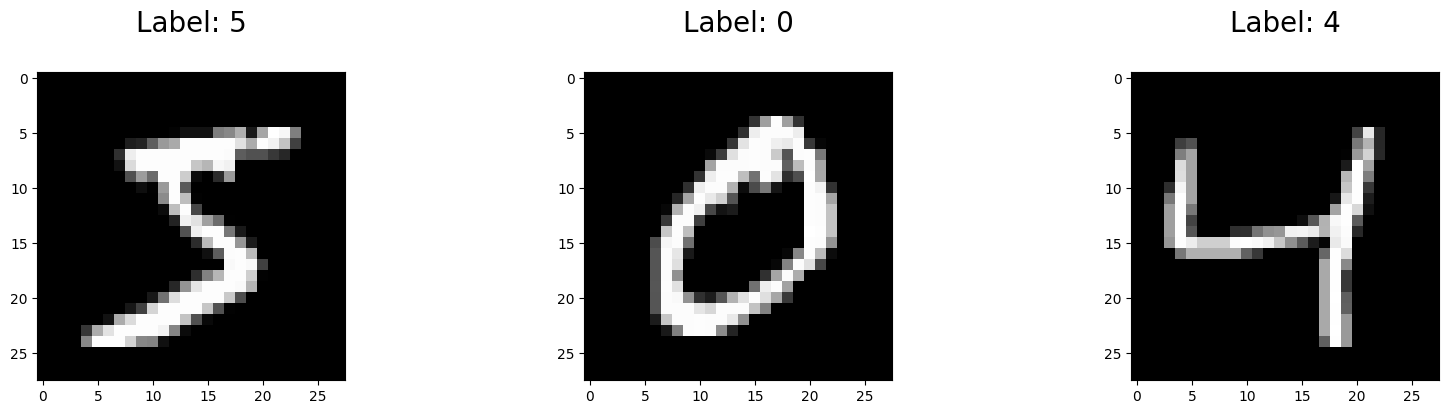

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

# Split into train and test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Convert to numpy arrays and scale for the model
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

# Show the first 3 images
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title("Label: %s\n" % label, fontsize=20)

In [2]:
# Train an MLP classifier using sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier object
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)


# Train the MLPClassifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/Users/80216583/Downloads/tutorials/python-projects/country-sort/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [3]:
# Show the accuracy on the training and test sets

print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Training set score: 0.9868
Test set score: 0.97


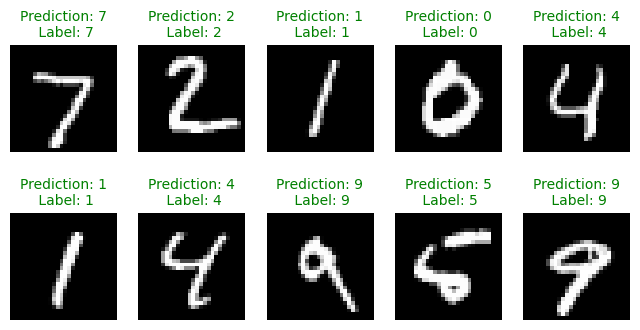

In [4]:
# Show the images, predictions, and original labels for 10 images

# Get the predictions for the test dataset
predictions = mlp.predict(X_test)

# Show the predictions in a grid
plt.figure(figsize=(8, 4))

for index, (image, prediction, label) in enumerate(
    zip(X_test[0:10], predictions[0:10], y_test[0:10])
):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    # Green if correct, red if incorrect
    fontcolor = "g" if prediction == label else "r"
    plt.title(
        "Prediction: %i\n Label: %i" % (prediction, label), fontsize=10, color=fontcolor
    )

    plt.axis("off")  # hide axes

In [5]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]

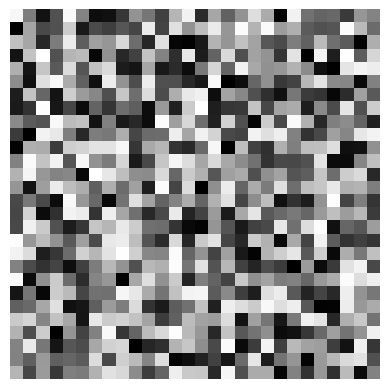

In [6]:
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

In [7]:
a = torch.tensor([[1, 1], [1, 0]])

print(a)
# tensor([[1, 1],
#         [1, 0]])

print(torch.matrix_power(a, 2))
# tensor([[2, 1],
#         [1, 1]])

print(torch.matrix_power(a, 3))
# tensor([[3, 2],
#         [2, 1]])

print(torch.matrix_power(a, 4))
# tensor([[5, 3],
#         [3, 2]])

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


In [8]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.output_layer = nn.Linear(64, 2)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

model = MLP(input_size=10)
print(model)
# MLP(
#   (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
#   (output_layer): Linear(in_features=64, out_features=2, bias=True)
#   (activation): ReLU()
# )

model.forward(torch.rand(10))
# tensor([0.2294, 0.2650], grad_fn=<AddBackward0>)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)


tensor([0.0255, 0.2366], grad_fn=<ViewBackward0>)

In [9]:
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

# Our dataset contains a single image of a dog, where
# cat = 0 and dog = 1 (corresponding to index 0 and 1)
target_tensor = torch.tensor([1])
target_tensor
# tensor([1])

tensor([1])

In [10]:
# Note that the values do not need to sum to 1
predicted_tensor = torch.tensor([[2.0, 5.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# tensor(0.0181)

tensor(0.0486)

In [11]:
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# tensor(0.9130)

tensor(0.9130)

In [12]:
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) # Loss value: 20000 * 20000 / 1 = ...
# 400000000.0

400000000.0


In [13]:
import torch.optim as optim

# momentum=0.9 smoothes out updates and can help training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

/Users/80216583/Downloads/tutorials/python-projects/country-sort/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
from torch.utils.data import Dataset

# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

# Instantiate the dataset
dataset = NumberProductDataset(
    data_range=(0, 11)
)
# Access a data sample
data_sample = dataset[3]
print(data_sample)
# ((3, 4), 12)


((3, 4), 12)


In [18]:
from torch.utils.data import DataLoader

# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)
# [tensor([4, 3, 1]), tensor([5, 4, 2])] tensor([20, 12, 2])
# [tensor([2, 0]), tensor([3, 1])] tensor([6, 0])

[tensor([3, 0, 1]), tensor([4, 1, 2])] tensor([12,  0,  2])
[tensor([4, 2]), tensor([5, 3])] tensor([20,  6])


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

In [20]:
dataset = NumberSumDataset(data_range=(1, 100))

for i in range(5):
    print(dataset[i])
# (tensor([1., 1.]), tensor([2.]))
# (tensor([1., 2.]), tensor([3.]))
# (tensor([1., 3.]), tensor([4.]))
# (tensor([1., 4.]), tensor([5.]))
# (tensor([1., 5.]), tensor([6.]))

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))


In [21]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [22]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
for epoch in range(10):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))
    # Epoch 0: Sum of Batch Losses = 118.82360
    # Epoch 1: Sum of Batch Losses = 39.75702
    # Epoch 2: Sum of Batch Losses = 2.16352
    # Epoch 3: Sum of Batch Losses = 0.25178
    # Epoch 4: Sum of Batch Losses = 0.22843
    # Epoch 5: Sum of Batch Losses = 0.19182
    # Epoch 6: Sum of Batch Losses = 0.15507
    # Epoch 7: Sum of Batch Losses = 0.07789
    # Epoch 8: Sum of Batch Losses = 0.06329
    # Epoch 9: Sum of Batch Losses = 0.04936

Epoch 0: Sum of Batch Losses = 0.40344
Epoch 1: Sum of Batch Losses = 0.38828
Epoch 2: Sum of Batch Losses = 0.36316
Epoch 3: Sum of Batch Losses = 0.34536
Epoch 4: Sum of Batch Losses = 0.32998
Epoch 5: Sum of Batch Losses = 0.31690
Epoch 6: Sum of Batch Losses = 0.29630
Epoch 7: Sum of Batch Losses = 0.28155
Epoch 8: Sum of Batch Losses = 0.26969
Epoch 9: Sum of Batch Losses = 0.25554


In [28]:
model(torch.tensor([3.0, 7.0]))

tensor([10.0605], grad_fn=<ViewBackward0>)